# WeatherPy
----

#### Observations
* There is a strong relationship between a cities location relative to the equator and its maximum temperature, especially for those cities in the Northern Hemisphere
* The further away a city in the Northern Hemisphere is from the equator, the lower the max temperature.
* The humidity, cloudiness, and wind speed do not seem to be determined by a city's position relative to the equator. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [3]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# Create lists to hold information
city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []

In [6]:
# Create variables to track record and set number
set_num = 1
record = 0

print("Beginning Data Retrieval\n-----------------------------")

# Loop through the list of cities and try to perform a request for data on each
for place in cities:
    try:
        response = requests.get(query_url + place).json()
        city_name.append(response['name']) 
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        record = record + 1
        
        # Update record number and set number once count reaches 50
        if record == 50:
            set_num = set_num + 1
            record = 0
        print(f"Processing Record {record} of Set {set_num} | {place}")
        
    except:
        print(f"City not found. Skipping...")
        pass

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | esperance
Processing Record 3 of Set 1 | port alfred
City not found. Skipping...
Processing Record 4 of Set 1 | kapaa
City not found. Skipping...
Processing Record 5 of Set 1 | namatanai
Processing Record 6 of Set 1 | sheridan
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | lasa
Processing Record 9 of Set 1 | bluff
City not found. Skipping...
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | gariaband
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | anderson
Processing Record 14 of Set 1 | koslan
Processing Record 15 of Set 1 | nhulunbuy
Processing Record 16 of Set 1 | saint george
Processing Record 17 of Set 1 | chokurdakh
Processing Record 18 of Set 1 | mahebourg
Processing Record 19 of Set 1 | trairi
City not found. Skipping...
Processing Record 20 of Set 1 | padang
Processing Record 2

Processing Record 38 of Set 4 | beian
Processing Record 39 of Set 4 | general roca
Processing Record 40 of Set 4 | ahipara
Processing Record 41 of Set 4 | bilibino
Processing Record 42 of Set 4 | mumford
Processing Record 43 of Set 4 | umm lajj
Processing Record 44 of Set 4 | tiznit
Processing Record 45 of Set 4 | mount isa
City not found. Skipping...
Processing Record 46 of Set 4 | isangel
Processing Record 47 of Set 4 | nanortalik
Processing Record 48 of Set 4 | nouadhibou
Processing Record 49 of Set 4 | barkhan
Processing Record 0 of Set 5 | northam
Processing Record 1 of Set 5 | tezu
Processing Record 2 of Set 5 | ilulissat
Processing Record 3 of Set 5 | labuhan
Processing Record 4 of Set 5 | puerto penasco
Processing Record 5 of Set 5 | cabo san lucas
Processing Record 6 of Set 5 | oranjemund
Processing Record 7 of Set 5 | yendi
Processing Record 8 of Set 5 | alofi
Processing Record 9 of Set 5 | faanui
Processing Record 10 of Set 5 | kaeo
Processing Record 11 of Set 5 | manggar
Pr

Processing Record 29 of Set 8 | saint-tite
Processing Record 30 of Set 8 | talnakh
Processing Record 31 of Set 8 | osa
Processing Record 32 of Set 8 | myrtle beach
Processing Record 33 of Set 8 | te anau
Processing Record 34 of Set 8 | muhos
Processing Record 35 of Set 8 | itaqui
Processing Record 36 of Set 8 | mabay
Processing Record 37 of Set 8 | kontagora
Processing Record 38 of Set 8 | houma
Processing Record 39 of Set 8 | mianyang
Processing Record 40 of Set 8 | chiang khong
Processing Record 41 of Set 8 | loikaw
Processing Record 42 of Set 8 | ajdabiya
Processing Record 43 of Set 8 | punta alta
Processing Record 44 of Set 8 | panjakent
Processing Record 45 of Set 8 | biak
Processing Record 46 of Set 8 | saint-georges
Processing Record 47 of Set 8 | taltal
City not found. Skipping...
City not found. Skipping...
Processing Record 48 of Set 8 | ponta delgada
Processing Record 49 of Set 8 | saint-pierre
Processing Record 0 of Set 9 | berdigestyakh
Processing Record 1 of Set 9 | jacar

Processing Record 23 of Set 12 | tshane
Processing Record 24 of Set 12 | presidencia roque saenz pena
Processing Record 25 of Set 12 | humboldt
Processing Record 26 of Set 12 | katobu


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a DataFrame
orig_df = pd.DataFrame({"City" : city_name,
                         "Lat" : latitude,
                          "Lng" : longitude,
                          "Max Temp" : max_temp,
                          "Humidity" : humidity,
                          "Cloudiness" : clouds,
                          "Wind Speed" : wind_speed,
                          "Country" : country,
                          "Date" : date})

# Save DataFrame to CSV
orig_df.to_csv(output_data_file, index=False, header=True)

orig_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.13,70,25,5.79,PF,1612839769
1,Esperance,-33.8667,121.9000,71.60,53,75,8.05,AU,1612839491
2,Port Alfred,-33.5906,26.8910,66.99,89,9,4.74,ZA,1612839769
3,Kapaa,22.0752,-159.3190,69.80,83,75,18.41,US,1612839769
4,Namatanai,-3.6667,152.4333,84.49,77,55,8.61,PG,1612839769


In [8]:
# Get descriptive statistics of the DataFrame
orig_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,20.685997,20.606714,48.282483,74.107639,52.298611,8.084358,1.612840e+09
std,33.300034,91.403274,31.876364,18.903569,40.092646,5.539195,6.979356e+01
min,-54.800000,-179.166700,-43.600000,1.000000,0.000000,0.220000,1.612839e+09
25%,-7.131100,-61.776300,24.760000,66.000000,6.750000,4.000000,1.612840e+09
50%,25.852000,24.763600,59.000000,79.000000,57.000000,6.910000,1.612840e+09
75%,47.979950,102.334775,74.387500,88.000000,93.250000,10.867500,1.612840e+09
max,78.218600,179.316700,95.000000,100.000000,100.000000,37.980000,1.612840e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Create a new DataFrame for the cities with humidity > 100%
high_humidity_df = orig_df[orig_df['Humidity'] > 100]

In [10]:
#  Get the indices of cities that have humidity over 100%.
index = list(high_humidity_df.index.values)
index

[]

In [11]:
# Create a clean DataFrame by dropping cities with inaccurate humidity values
city_data_df = orig_df.drop(high_humidity_df.index, inplace = False)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.13,70,25,5.79,PF,1612839769
1,Esperance,-33.8667,121.9000,71.60,53,75,8.05,AU,1612839491
2,Port Alfred,-33.5906,26.8910,66.99,89,9,4.74,ZA,1612839769
3,Kapaa,22.0752,-159.3190,69.80,83,75,18.41,US,1612839769
4,Namatanai,-3.6667,152.4333,84.49,77,55,8.61,PG,1612839769


In [12]:
# Get descriptive statistics of the DataFrame
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,20.685997,20.606714,48.282483,74.107639,52.298611,8.084358,1.612840e+09
std,33.300034,91.403274,31.876364,18.903569,40.092646,5.539195,6.979356e+01
min,-54.800000,-179.166700,-43.600000,1.000000,0.000000,0.220000,1.612839e+09
25%,-7.131100,-61.776300,24.760000,66.000000,6.750000,4.000000,1.612840e+09
50%,25.852000,24.763600,59.000000,79.000000,57.000000,6.910000,1.612840e+09
75%,47.979950,102.334775,74.387500,88.000000,93.250000,10.867500,1.612840e+09
max,78.218600,179.316700,95.000000,100.000000,100.000000,37.980000,1.612840e+09


In [13]:
# Extract date value and assign to a variable
date_orig_df = city_data_df
date_time_values = pd.to_datetime(date_orig_df['Date'],unit='s')
date_values = date_time_values.dt.date
date = date_values[0]
date = date.strftime('%m/%d/%y')
date

'02/09/21'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

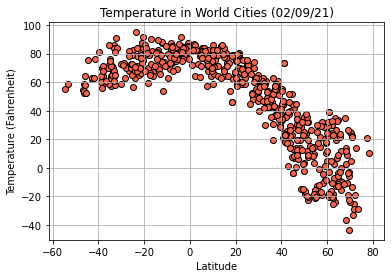

In [14]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color = 'tomato', edgecolors = 'black')

# Label plot
plt.title(f"Temperature in World Cities ({date})")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/TemperatureInWorldCities.png")

# Show plot
plt.show()

This graph plots the maximum temperature for each city in the dataset, against its latitude value. The equator is at 0 degrees latitude, while the South Pole is at -90 degrees and the North Pole is at +90 degrees. In essence this graph is showing the maximum temperature (F) in a city as compared to its position relative to the equator. Countries in the Northern Hemisphere appear to have lower temperatures than those in the Southern Hemisphere. 

## Latitude vs. Humidity Plot

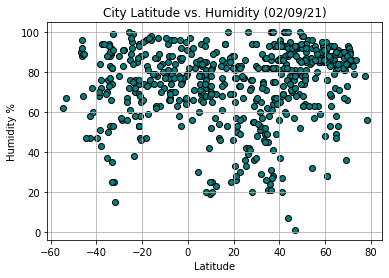

In [15]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color = 'teal', edgecolors = 'black')

# Label plot
plt.title(f"City Latitude vs. Humidity ({date})")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/CityLatitude_vs_Humidity.png")

# Show plot
plt.show()

This graph plots the humidity for each city in the dataset, against its latitude value. The equator is at 0 degrees latitude, while the South Pole is at -90 degrees and the North Pole is at +90 degrees. In essence this graph is showing the humidity (%) in a city as compared to its position relative to the equator. A city's relative position does not appear to determine its humidity levels.

## Latitude vs. Cloudiness Plot

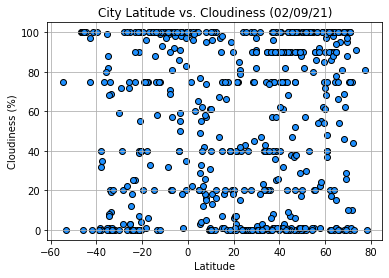

In [16]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color = 'dodgerblue', edgecolors = 'black')

# Label plot
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/CityLatitude_vs_Cloudiness.png")

# Show plot
plt.show()

This graph plots the cloudiness percentage for each city in the dataset, against its latitude value. The equator is at 0 degrees latitude, while the South Pole is at -90 degrees and the North Pole is at +90 degrees. In essence this graph is showing the cloudiness (%) in a city as compared to its position relative to the equator. A city's position does not appear to determine its cloudiness levels.

## Latitude vs. Wind Speed Plot

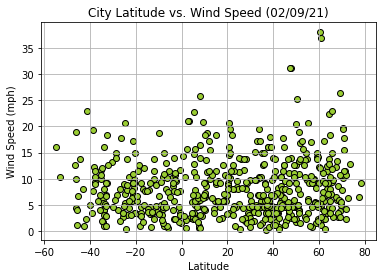

In [17]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color = 'yellowgreen', edgecolors = 'black')

# Label plot
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/CityLatitude_vs_WindSpeed.png")

# Show plot
plt.show()

This graph plots the wind speed for each city in the dataset, against its latitude value. The equator is at 0 degrees latitude, while the South Pole is at -90 degrees and the North Pole is at +90 degrees. In essence this graph is showing the wind speed (mph) in a city as compared to its position relative to the equator.

## Linear Regression

In [18]:
# Create df for Northern Hemisphere and Southern Hemisphere
northern_hem_df = city_data_df[city_data_df['Lat'] > 0]
southern_hem_df = city_data_df[city_data_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7598039375827113


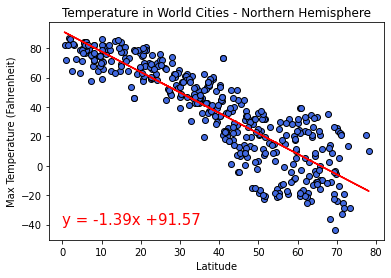

In [19]:
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, color = "royalblue", edgecolor = 'black')
plt.plot(x_values,regress_values, "red")

# Label plot
plt.title("Temperature in World Cities - Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Fahrenheit)')
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.33846334803168915


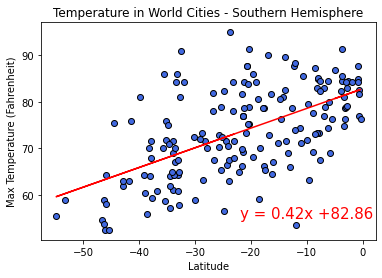

In [38]:
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, color = "royalblue", edgecolor = 'black')
plt.plot(x_values,regress_values, "red")

# Label plot
plt.title("Temperature in World Cities - Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Fahrenheit)')
plt.annotate(line_eq,(-22, 55),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The graphs above study the relationship between a city's position relative to the equator and its maximum temperature. The data is divided into the northern and southern hemisphere to make it easier to identify trends. From this analysis, there appears to be a strong linear relationship between the observed and predicted values for cities in the northern hemisphere. This is evident in the r value of 0.76. The temperatures in the southern hemisphere, on the other hand, have an r value of 0.34. This indicates that there is a weak relationship between the observed and predicted values. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05998137283532665


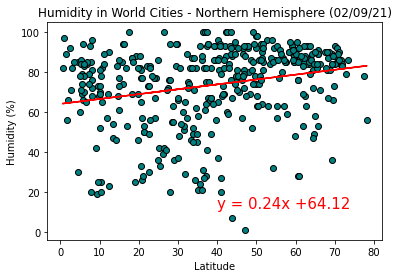

In [34]:
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, color = "teal", edgecolor = 'black')
plt.plot(x_values,regress_values, "red")

# Label plot
plt.title(f"Humidity in World Cities - Northern Hemisphere ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(40,12),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.023093266774229


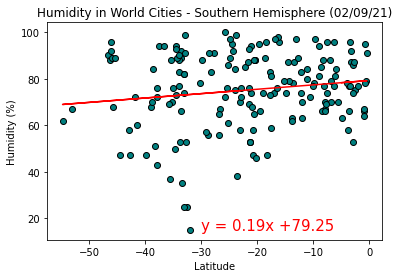

In [33]:
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, color = "teal", edgecolor = 'black')
plt.plot(x_values,regress_values, "red")

# Label plot
plt.title(f"Humidity in World Cities - Southern Hemisphere ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

There appears to be a weak linear relationship between the predicted and observed humidity levels for cities across both hemispheres. The model for cities in the northern hemisphere has an r value of 0.06 and that in the southern hemisphere has an r value of 0.02. These indicate that there is little to no relationship between the actual humidity levels and those predicted by the model. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04186923325004092


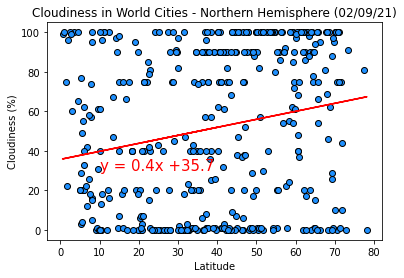

In [32]:
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, color = "dodgerblue", edgecolor = 'black')
plt.plot(x_values,regress_values, "red")

# Label plot
plt.title(f"Cloudiness in World Cities - Northern Hemisphere ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(10,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10248710540924369


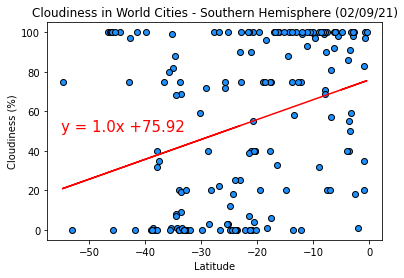

In [24]:
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, color = "dodgerblue", edgecolor = 'black')
plt.plot(x_values,regress_values, "red")

# Label plot
plt.title(f"Cloudiness in World Cities - Southern Hemisphere ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-55, 50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

There appears to be a weak linear relationship between the cloudiness levels in a city and those predicted by the model. The r value for the model in the northern hemisphere is 0.04 and that in the southern hemisphere is 0.10. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0027177820861157935


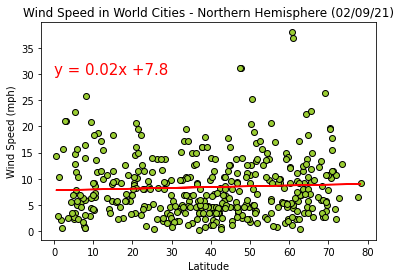

In [25]:
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, color = "yellowgreen", edgecolor = 'black')
plt.plot(x_values,regress_values, "red")

# Label plot
plt.title(f"Wind Speed in World Cities - Northern Hemisphere ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(0,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.023539359096250767


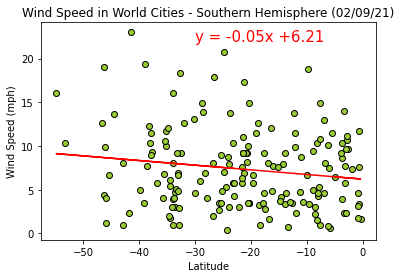

In [28]:
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, color = "yellowgreen", edgecolor = 'black')
plt.plot(x_values,regress_values, "red")

# Label plot
plt.title(f"Wind Speed in World Cities - Southern Hemisphere ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-30, 22),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

There appears to be little to no linear relationship between the wind speed in a given city and those predicted by the model. The r value for the northern hemisphere is 0.002 and that for the southern hemisphere is 0.024.